In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#Lab 1 spin rates
rpm_1 = [2500,3000,3500,4000]
thickness_1 = [200,519,469,352]
#all developed for 30 seconds besides the first since it was under exposed

#Lab 2 spin rates
rpm_2 = [2000,3000,4000,5000]
thickness_2 = [530, 460, 420, 375]


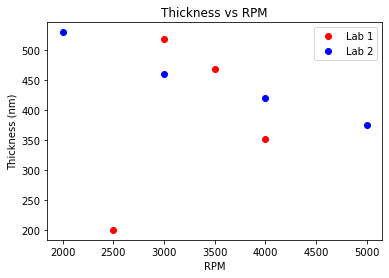

In [4]:
#plotting
plt.plot(rpm_1, thickness_1, 'ro', label = 'Lab 1')
plt.plot(rpm_2, thickness_2, 'bo', label = 'Lab 2')
plt.xlabel('RPM')
plt.ylabel('Thickness (nm)')
plt.title('Thickness vs RPM')
plt.legend()
plt.show()

In [5]:
#making it one set
rpm = rpm_1 + rpm_2
thickness = thickness_1 + thickness_2

#reogranize the data based on rpm
data = {'rpm': rpm, 'thickness': thickness}
df = pd.DataFrame(data)

df

,rpm,thickness
0,2500,200
1,3000,519
2,3500,469
3,4000,352
4,2000,530
5,3000,460
6,4000,420
7,5000,375


In [6]:
#calculate IQR

Q1 = df['thickness'].quantile(0.25)
Q3 = df['thickness'].quantile(0.75)
IQR = Q3 - Q1

IQR

#remove outliers
df = df[~((df['thickness'] < (Q1 - 1.5 * IQR)) |(df['thickness'] > (Q3 + 1.5 * IQR)))]

#one outlier was removed, the point with 90 second exposure time
#the other 7 were not chosen as outliers due to 3/2IQR



df

,rpm,thickness
1,3000,519
2,3500,469
3,4000,352
4,2000,530
5,3000,460
6,4000,420
7,5000,375


In [7]:
#the 2000, 3000, 4000 points have repeats. Lets average them into 1 data point per x value
#we treated one of the 2000 as a outlier. We only need to do this for 4000/3000

average_4000 = (352+420)/2
average_3000 = (519+460)/2

#remove all 4000 points
df = df[df.rpm != 4000]
df = df[df.rpm != 3000]

#add the average back in
df = df.append({'rpm': 4000, 'thickness': average_4000}, ignore_index=True)
df = df.append({'rpm': 3000, 'thickness': average_3000}, ignore_index=True)



#reorder df by rpm
df = df.sort_values(by=['rpm'])

df

/var/folders/0p/gqwrfts538g0nczcykltdf980000gn/T/ipykernel_35766/3632413892.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'rpm': 4000, 'thickness': average_4000}, ignore_index=True)
/var/folders/0p/gqwrfts538g0nczcykltdf980000gn/T/ipykernel_35766/3632413892.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'rpm': 3000, 'thickness': average_3000}, ignore_index=True)


,rpm,thickness
1,2000.0,530.0
4,3000.0,489.5
0,3500.0,469.0
3,4000.0,386.0
2,5000.0,375.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


y=695.2013742900575*e^(-0.00012632912084770042x)


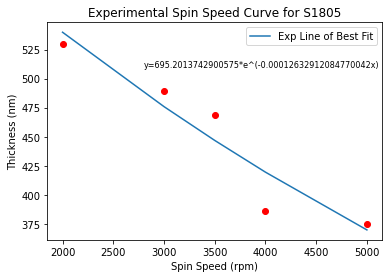

In [35]:
#plotting
plt.plot(df['rpm'], df['thickness'], 'ro')

plt.xlabel('Spin Speed (rpm)')
plt.ylabel('Thickness (nm)')
plt.title('Experimental Spin Speed Curve for S1805')
plt.legend()


#plotting the line of best fit in exponential
x = df['rpm']
y = df['thickness']

#fitting the data to an exponential curve
fit = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
y = np.exp(fit[1]) * np.exp(fit[0]*x)

#plotting the line of best fit
plt.plot(x,y, label='Exp Line of Best Fit')

#put the coeff of the exponential line of best fit in text on the graph

text = "y="+str(np.exp(fit[1]))+"*e^("+str(fit[0])+"x)"
plt.text(2800, 510, text, ha='left', wrap=True, fontsize=8)

print("y="+str(np.exp(fit[1]))+"*e^("+str(fit[0])+"x)")



plt.legend()


#save this image as a png

plt.savefig('thickness_vs_rpm.png', dpi=300, bbox_inches='tight',facecolor='w')
plt.show()

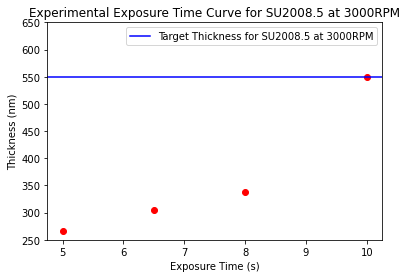

In [36]:
#second graph

exp_time = [5,6.5,8,10]
thickness_gr2 = [267,304,338,550]

#plotting
plt.plot(exp_time, thickness_gr2, 'ro')

plt.xlabel('Exposure Time (s)')
plt.ylabel('Thickness (nm)')

plt.title('Experimental Exposure Time Curve for SU2008.5 at 3000RPM')


#plot a horizongtal line at 550 nm

plt.axhline(y=550, color='b', linestyle='-', label = 'Target Thickness for SU2008.5 at 3000RPM')
plt.legend()
plt.yticks(np.arange(250, 700, 50))


plt.savefig('thickness_vs_exp_time.png', dpi=300, bbox_inches='tight',facecolor='w')

plt.show()
